   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

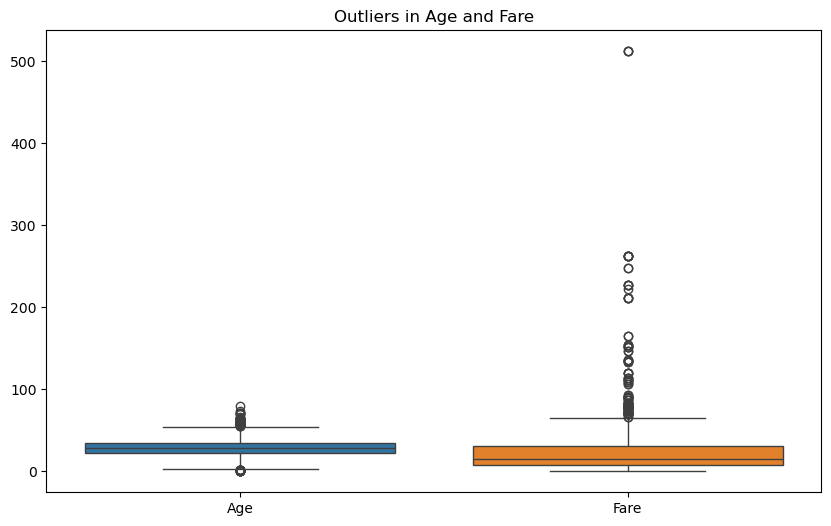

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare    Cabin  \
0         0       3    1 -0.637115      1      0 -0.737419  Unknown   
2         1       3    0 -0.216039      0      0 -0.687065  Unknown   
3         1       1    0  0.731381      1      0  2.682952     C123   
4         0       3    1  0.731381      0      0 -0.677740  Unknown   
5         0       3    1 -0.005501      0      0 -0.647281  Unknown   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  
         Survived      Pclass         Sex           Age       SibSp  \
count  708.000000  708.000000  708.000000  7.080000e+02  708.000000   
mean     0.331921    2.518362    0.680791 -6.774242e-17    0.399718   
std      0.471236    0.714332    0.466500  1.000707e+00    0.840859   
min      0.000000    1.000000    0.000000 -2.531954e+00    0.000000   
25%      0.000000    2.000000    0.000000 -6.37114

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv("Titanic-Dataset.csv")
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) 
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Outliers in Age and Fare')
plt.show()
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]
df = remove_outliers(df, 'Fare')
df = remove_outliers(df, 'Age')
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df.head())
print(df.describe())